In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
x = np.array([2.31, 0.94, 1.55, 1.10, 1.68, -0.16, 0.48,
1.49, 1.20, 1.48, 0.85, 3.21, 1.71, 4.01,
2.10, 0.26, 1.97, 1.09, 2.72, 1.18, 0.28,
0.30, 1.40, 0.59, 1.99, 2.14, 1.59, 1.50,
0.48, 2.12, 1.15, 2.54, 0.70, 1.63, 1.47,
1.71, 1.41, 0.95, 1.55, 1.28, 0.44, -1.72,
0.19, 2.73, 0.45, 0.49, 1.23, 2.44, -1.62,
0.00, 1.33, -0.51, 1.62, 0.06, 2.20, 1.87,
0.66, 0.26, 2.36, 2.40, 1.00, 2.30, 1.74,
-1.27, 3.11, 1.03, 0.59, 1.37, 1.30, 0.78,
1.01, 0.99, 0.24, 2.18, 2.24, 0.22, 1.01,
-0.54, 0.24, 2.66, 1.14, 1.06, 1.09, 1.63,
1.70, 1.35, 1.00, 1.21, 1.75, 3.27, 1.62,
2.58, 0.60, 0.19, 1.43, 2.21, 0.49, 0.46,
0.56, 1.17, 2.28, 2.02, 1.71, 1.08, 2.08,
0.38, 1.12, 0.01, 1.82, 1.96, 0.77, 1.70,
0.77, 2.79, 0.31, 1.11, 1.69, 1.23, 2.05,
2.29, 0.17, -0.12, 2.69, 1.78, 2.26, 0.02,
1.55, 0.44, 0.89, 1.51, -0.67, 1.06, -0.05,
0.27, 0.78, 0.60, 1.06, 2.29, 1.13, 1.85,
1.62, 1.50, 0.21, 2.04, 1.26, 1.98, 1.50,
0.94, 0.17, 1.90, 1.64, 1.12, 0.89, 0.49])

In [ ]:
x = pd.Series(x)
x.describe()

count    154.000000
mean       1.230390
std        0.923186
min       -1.720000
25%        0.590000
50%        1.220000
75%        1.810000
max        4.010000
dtype: float64

In [ ]:
# Get median
x.median()

1.22

In [ ]:
# Get skewness
x.skew()

-0.22909373047829945

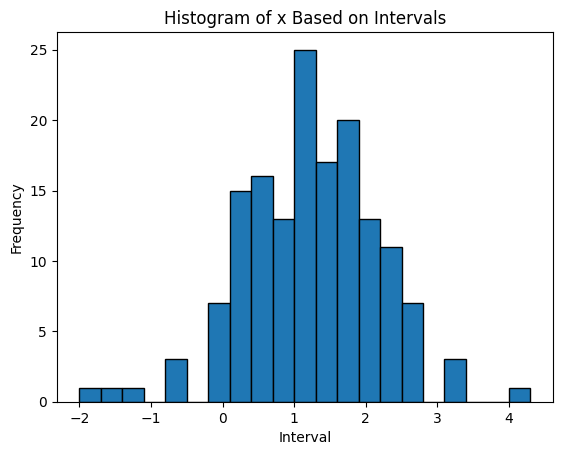

In [ ]:
# Create a histogram
bin_range = np.arange(-2, 4.6, 0.3)
plt.hist(x, bins=bin_range, edgecolor='black')
plt.title('Histogram of x Based on Intervals')
plt.xlabel('Interval')
plt.ylabel('Frequency')
plt.show()

In [ ]:
np.var(x)

0.8467388092427053

In [ ]:
np.sqrt(np.var(x))

0.9201841170345776

This looks bell shaped and seems to be normal distribution. Also, the mean and the median are close, skewness is close to 0. We make the hypothesis that this data follows a normal distribution.

So the MLEs are $\hat{\mu}=1.230$ (just the mean), and $\hat{\sigma}^2=\frac{1}{n} \sum_{i=1}^n\left(x_i-\hat{\mu}\right)^2 =0.847$

So we hypothesize that the data follows $\mathcal{N}(1.230,0.847)$

To check good of fit, we do a QQ plot. Since the plot is quite linear, we conclude that there is a good fit.

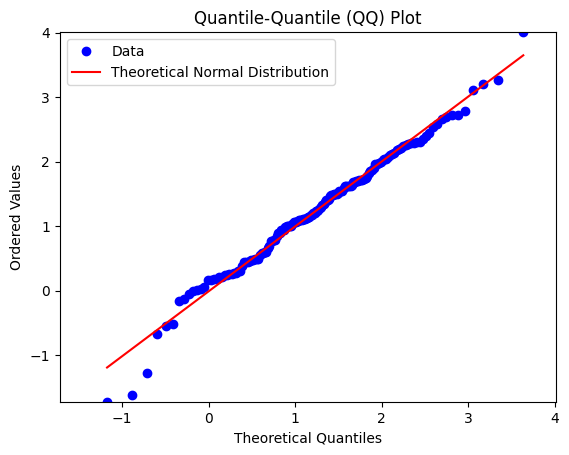

In [ ]:
mu = np.mean(x)
sigma = np.std(x)
stats.probplot(x, dist=stats.norm, sparams=(mu, sigma), plot=plt)
plt.title('Quantile-Quantile (QQ) Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.xlim(-1.72, 4.01)
plt.ylim(-1.72, 4.01)
plt.legend(['Data', 'Theoretical Normal Distribution'], loc='upper left')
plt.show()

We can also check good of fit with a PP plot. Since the plot is quite linear, we conclude that there is a good fit.

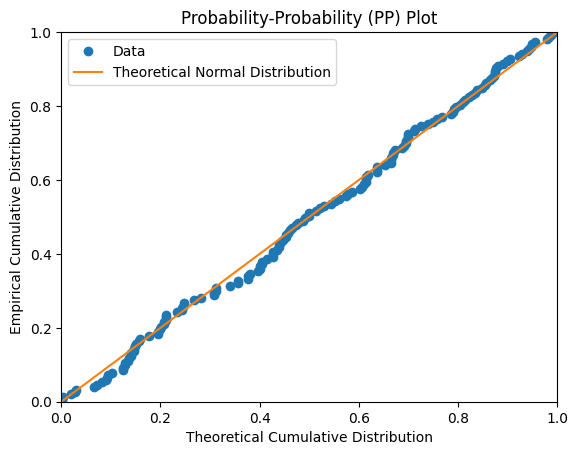

In [ ]:
# Generate PP plot
sorted_data = np.sort(x)
n = len(sorted_data)
pp = np.linspace(0, 1, n)
theoretical_cdf = stats.norm.cdf(sorted_data, loc=mu, scale=sigma)
plt.plot(theoretical_cdf, pp, marker='o', linestyle='', label='Data')
plt.plot(pp, pp, label='Theoretical Normal Distribution')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc='upper left')
plt.title('Probability-Probability (PP) Plot')
plt.xlabel('Theoretical Cumulative Distribution')
plt.ylabel('Empirical Cumulative Distribution')
plt.show()


